<a href="https://colab.research.google.com/github/SahilK-027/Factor-Analysis-Mini-Project/blob/main/MiniProject_FA_BodyPerformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Use Factor Analysis To reduce Dimentionality & Interpret The Factors**



---


The goal of factor analysis **is to describe** variability among **correlated variables** in **fewer variables called factors.** 
 It is based on the idea that there exist some “latent” factors , which can describe multiple variables in our data.

# **AIM ▶**
To use factor analysis to reduce the dimentionality of this data which has **12 Variable** and reduce those 12 variables to **3 factors**.

# **Topics ▶**
🔷 Importing Data ▶

🔷 Graphical Visualization ▶

🔷 Adequacy Test ▶

1) Bartlett’s test ▶

2) Kaiser-Meyer-Olkin (KMO) Test ▶

🔷 Factor Analysis ▶

How many factors ?

🔷 Factor Loading AND Interpret the factors ▶





In [ ]:
pip install factor_analyzer

     |████████████████████████████████| 41 kB 494 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=9d8fa777f312bf4ba8abb6360a878dc49c5f3bfa8988fd3a5256643f5180c3a4
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
#Importing required modules
import pandas as pd #n Pandas is a Python library for data analysis
import sklearn.datasets # Statistical tools like classification, regression, clustering and dimensionality reduction
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt #Plotting graphs
import seaborn as sns # for data visualization in better graphics
import numpy as np # Mathematical calculations

In [ ]:
#Import File
df= pd.read_csv("bodyPerformance.csv")

In [ ]:
df.head(10)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
5,36.0,F,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B
6,42.0,F,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D
7,33.0,M,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,B
8,54.0,M,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,C
9,28.0,M,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,B


# **DATA**

---


Context
This is **data that confirmed the grade of body performance** with **age and some exercise performance** data.

Content
data shape : (13393, 12)

1) age : 20 ~64 yrs

2) gender : Female ,Male

3) height_cm : 

4) weight_kg :

5) body fat_% :

6) diastolic : diastolic blood pressure (min)

7) systolic : systolic blood pressure (min)

8) gripForce :     

9) sit and bend forward_cm :    

10) sit-ups counts :     

11) broad jump_cm :    

12) class : A,B,C,D (A: best) / stratified

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


# There are **two columns** containing datatype object we need int or float for performing factor analysis
# 1) As male and female will have different body performnace we will need those variables since they are correlated with other variables
# 2) but class variable will not have significant relation with other variables we will drop this column

In [ ]:
df.drop(["class"],axis=1,inplace=True)
df["gender"].replace({"M": 0, "F": 1}, inplace=True)

In [ ]:
df.head(10)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0
5,36.0,1,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0
6,42.0,1,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0
7,33.0,0,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0
8,54.0,0,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0
9,28.0,0,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0


In [ ]:
df.describe()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,0.367804,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,0.482226,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,0.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,0.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,0.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,1.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,1.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [ ]:
df.var()

age                         185.658051
gender                        0.232542
height_cm                    71.007293
weight_kg                   142.794526
body fat_%                   52.661786
diastolic                   115.391275
systolic                    216.500428
gripForce                   112.887736
sit and bend forward_cm      71.515386
sit-ups counts              203.824115
broad jump_cm              1589.457435
dtype: float64

In [ ]:
df.shape

(13393, 11)

In [ ]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object')

# **GRAPHICAL VISUALIZATION ▶**




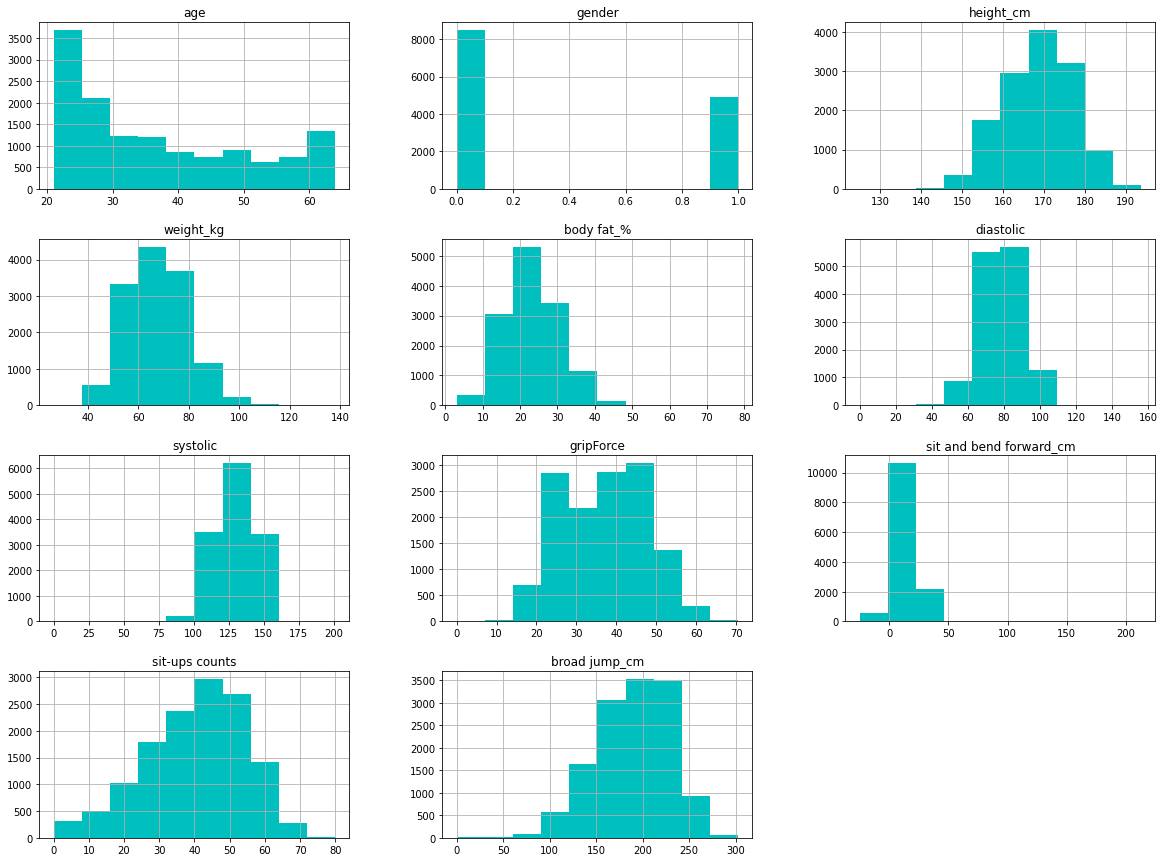

In [ ]:
df[df.columns].hist(color="c",figsize=(20,15))
plt.show()

# The histogram plot shows us _
1) Age group of pleople in dataset : **20 to 60** years

2) There are around **65% males and 35% female** in data

3) Height is in range **125 to 195** cm

4) Weight is in range **25 to 140** kg

5) Body fat percentage is **3% to 78.4 %**

6) Distolic blood pressure is within range **0 mmHg to 157 mmHg**

7) sistolic blood pressure is within range **0 mmHg to 202 mmHg**

8) Grip strenth is in range** 0 to 215**

9) sit and bend forward tests reasultsare in range **-25 cm to 215 cm**

10) sit-ups count are in range **0 to 80**

11) Broad jump range :** 0 to 305 cm**

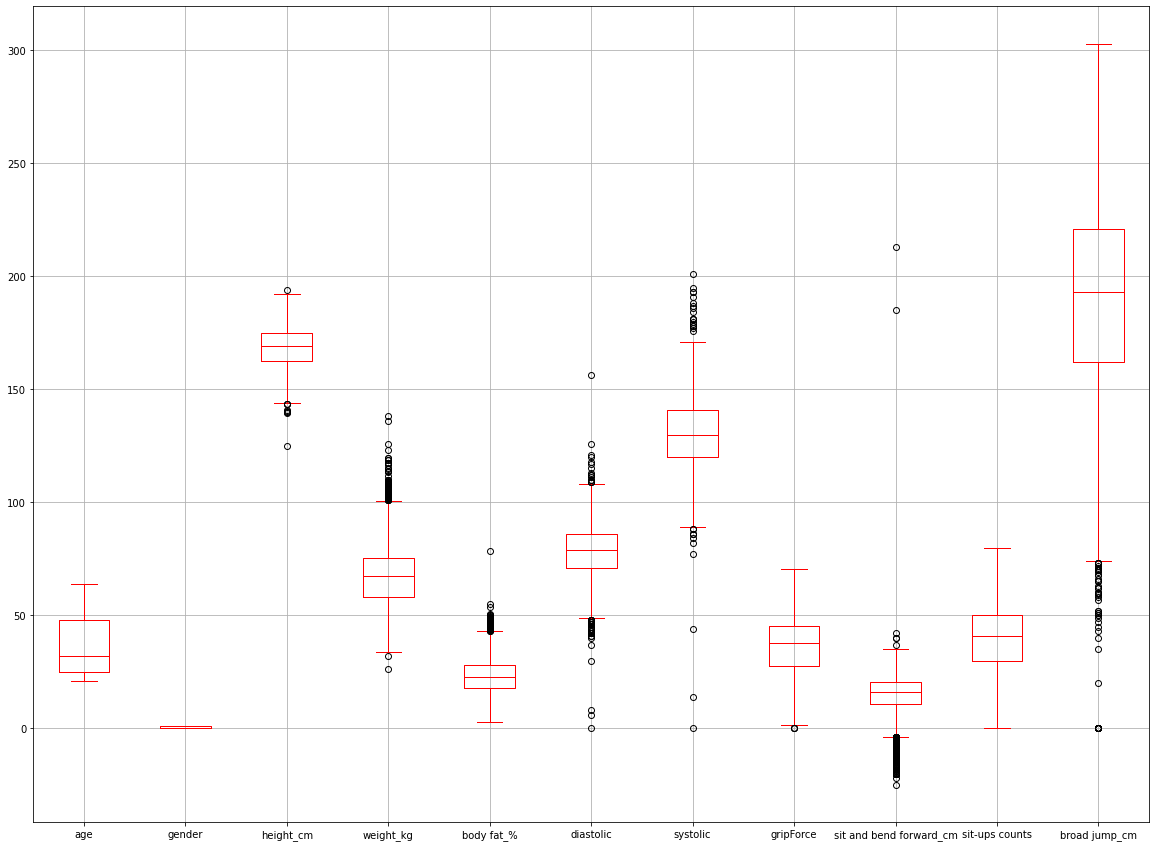

In [ ]:
df[df.columns].boxplot(color="r",figsize=(20,15))
plt.show()

#A correlation plot of all the variables is the first step in any factor analysis to evaluate ***whether some variables are useless or too correlated with others.***

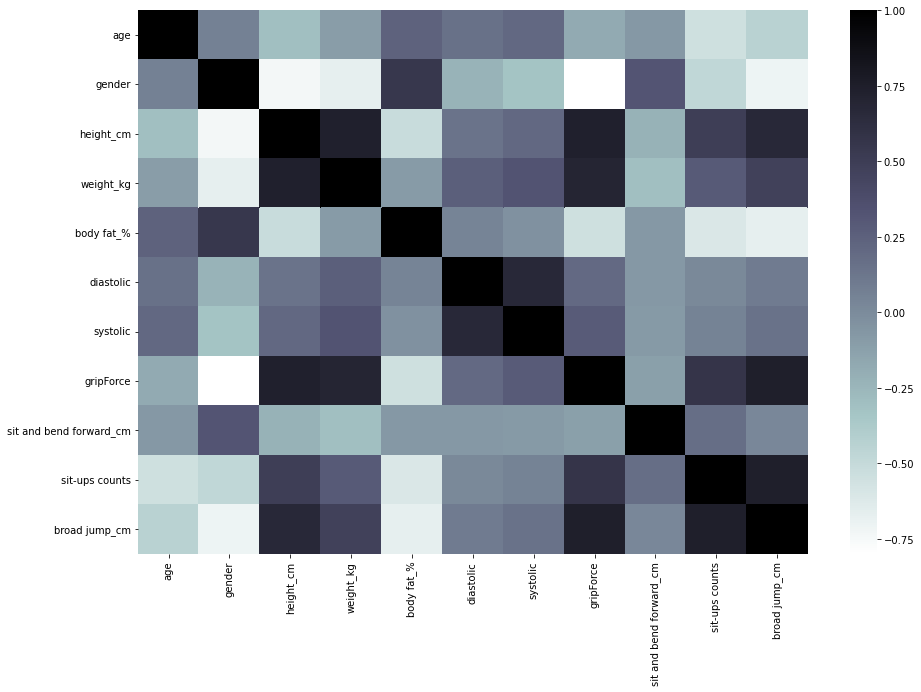

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
c = df.corr()
sns.heatmap(c,cmap = 'bone_r')

# **Adequacy Test** ▶
Before you perform factor analysis, we need to evaluate the “factorability” of our dataset. 
Factorability means "**can we found the factors in the dataset?**". 
There are two methods to check the factorability or sampling adequacy :

1)***Bartlett’s Test***

2)***Kaiser-Meyer-Olkin Test***



# **1) Bartlett’s test** ▶
Bartlett’s test  **checks** whether or not the **observed variables intercorrelate.**

If the test found statistically insignificant, you **should not use** factor analysis. 

In [ ]:
#bartlett test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(105723.6914707095, 0.0)

# In this Bartlett’s test, the **p-value is 0**. The test was statistically significant, 
indicating that the observed **correlation matrix is not an identity matrix.**

# **2)Kaiser-Meyer-Olkin (KMO) Test** ▶
Measures the suitability of data for factor analysis. 
It determines the adequacy for each observed variable and for the complete model.
KMO **estimates the proportion of variance among all the observed variable.**
KMO values range between 0 and 1. 
In general, KMO values **less than 0.6** indicate the sampling is not adequate and that remedial action should be taken

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.7800998202764843

**The KMO value for our data is 0.78**, which shows our data is adequate. 
This value indicates that you can proceed with your planned factor analysis.

# **AS WE HAVE CHECK THE ADEQUECY OF OUR DATA LET'S PERFORM**
# **FACTOR ANALYSIS**

In [ ]:
# Create factor variables and perform fdactor analysis
fa=FactorAnalyzer(3,rotation="varimax")
fa.fit(df)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

# **We are using VARIMAX ROTATION**
Varimax rotation is a statistical technique used at one level of factor analysis as an attempt to clarify the relationship among factors. To maximize the variance, while decreasing the correlation on any other factor.

In [ ]:
#get eigen vectors and eigen values
ev,v=fa.get_eigenvalues()
ev

array([4.89149459, 2.10240547, 1.24195491, 0.84593156, 0.65242217,
       0.32232472, 0.31016798, 0.21836364, 0.17795954, 0.13975215,
       0.09722327])

# **WHY WE ARE CHOOSING ONLY 3 FACTORS ?**
There are 3 techniques in determining number of factors

# **1) Eigenvalue > 1**
**The number of factors to be chosen equals the number of Eigenvalues > 1**

We may choose **3 Factors** since we have **3 Eigen** values larger than 1: 4.89149459, 2.10240547, and 1.24195491.

# **OR**
# **2)Total Percent Variance Explained**
Percentage Variance Explained should not go below 60%. If the variance explained in a model is less than 60%, there is a good likelihood that more factors will appear in the model than predicted.
If the variance explained is greater than 35%, the data is useless.

**Sum of the first three values of the eigen = 4.89149459 + 2.10240547 + 1.24195491 = 8.14585497**

**Total degree of variation = 11**

**Variance explained as a percentage = 8.14585497/11 = 74.05 percent**

As a result, our three factors will explain **74.05 percent ** of the data, resulting in >75 percent variance explained by our three factors.
# **OR**
# **3) Scree plot** 
The scree plot is another alternative. The eigenvalues are on the y-axis, and the number of factors is on the x-axis, in a scree plot. It has a downhill curvature at all times.
The point where the curve's slope clearly forms **the elbow** denotes the number of factors that the analysis should yield.





# ***SCREE PLOT*** ▶

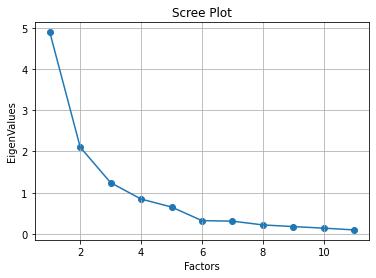

In [ ]:
#ploting grphs
xval= range(1,df.shape[1]+1)
plt.scatter(xval,ev)
plt.plot(xval,ev)
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("EigenValues")
plt.grid()
plt.show()

# **FACTOR LOADINGS AND INTERPRETATION** ▶

In [ ]:
#Get loadings of each variable
load=fa.loadings_

In [ ]:
pd.DataFrame.from_records(load)

,0,1,2
0,-0.500627,0.028554,0.223311
1,-0.487827,-0.720946,-0.235490
2,0.542182,0.679280,0.097852
3,0.227215,0.770937,0.236794
4,-0.703363,-0.134093,0.002601
5,-0.033872,0.125047,0.702589
6,0.007569,0.150476,0.929395
7,0.611950,0.602417,0.224452
8,0.199944,-0.480648,-0.001599
9,0.897624,0.039392,0.038018


As we can see here the 
# Variables 9 and 10, i.e. sit-up counts and broad jump, are significantly loaded in Factor 1.
# Variables 2, 3, and 7 (height, weight, and gripForce) are significantly loaded in factor 2.
# Variables 5 and 6, i.e. diastolic and systolic pressure, are significantly weighted in factor 3.

So, instead of employing all 12 variables, we may focus on these 3 factors in the future. **These 3 factors might be substituted for the 12 variables**

Here are the three factors that were formed, and we can **"interpret"** them based on the variables they contain:

# factor 1 = **Exercise Performed**        
# factor 2 = **Physical strength** 
# factor 3 = **Heart Health**     
      


SO finally we can conclude Body performance deped on this 3 factors 

1 How much **workout** an individual do  ?

2 What kind of **body and strength** does one have?

3 How excellent is his **heart health and endurance**?

